In [30]:
import re
import pandas as pd
import numpy as np

In [31]:
f = open('WhatsApp Chat with Jaagrit Tiet.txt','r', encoding='utf-8')

In [32]:
data = f.read()

In [34]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [67]:
messages = re.split(pattern, data)[1:]

In [65]:
dates = re.findall(pattern,data)

In [37]:
df = pd.DataFrame({'user_messages': messages, 'message_date': dates})
df['message_date']= pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df

,user_messages,message_date
0,Messages and calls are end-to-end encrypted. N...,2022-01-03 21:59:00
1,Kushang Garg: <Media omitted>\n,2022-01-03 21:59:00
2,Kushang Garg: <Media omitted>\n,2022-01-03 21:59:00
3,Kushang Garg: Bhai iska 3 nd 4part btaiyo\n,2022-01-03 21:59:00
4,Jaagrit Tiet: 10 min\n,2022-01-03 22:00:00
...,...,...
550,Jaagrit Tiet: na ek km na ek zyada\n,2023-03-30 21:24:00
551,Kushang Garg: Itne bhai acc mei hai nhi\n,2023-03-30 21:24:00
552,Jaagrit Tiet: 😂😂\n,2023-03-30 21:24:00
553,Kushang Garg: <Media omitted>\n,2023-03-30 21:25:00


In [38]:
users =[]
messages = []
for message in df['user_messages']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])


df['users']=users
df['messages'] = messages
df.drop(columns = ['user_messages'], inplace = True)
df

,message_date,users,messages
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n
...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n


In [39]:
years = df['message_date'].dt.year

In [40]:
df['year'] = years
df

,message_date,users,messages,year
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n,2022
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n,2022
...,...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n,2023
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n,2023
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n,2023
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n,2023


In [41]:
months = df['message_date'].dt.month_name()
df['month'] = months

,message_date,users,messages,year,month
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,January
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n,2022,January
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n,2022,January
...,...,...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n,2023,March
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n,2023,March
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n,2023,March
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n,2023,March


In [42]:
date  = df['message_date'].dt.day
df['date'] = date
df

,message_date,users,messages,year,month,date
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,January,3
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n,2022,January,3
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n,2022,January,3
...,...,...,...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n,2023,March,30
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n,2023,March,30
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n,2023,March,30
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n,2023,March,30


In [43]:
hours = df['message_date'].dt.hour
minute = df['message_date'].dt.minute
df['hour']=hours
df['minute']=minute
df

,message_date,users,messages,year,month,date,hour,minute
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,January,3,21,59
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3,21,59
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3,21,59
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n,2022,January,3,21,59
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n,2022,January,3,22,0
...,...,...,...,...,...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n,2023,March,30,21,24
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n,2023,March,30,21,24
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n,2023,March,30,21,24
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n,2023,March,30,21,25


In [44]:
Users5 =df['users'].unique().tolist()
k = len(Users5)


3

In [45]:
words =[]
for message in df['messages']:
    words.append(message.split())

In [46]:
len(words)

555

In [47]:
from urlextract import URLExtract
extractor =URLExtract()

In [48]:
links =[]
for message in df['messages']:
    links.extend(extractor.find_urls(message))


In [49]:
len(links)

7

In [66]:
temp = df[df['users']!='group_notification']
x = temp['users'].value_counts()
x



users
Jaagrit Tiet    310
Kushang Garg    244
Name: count, dtype: int64

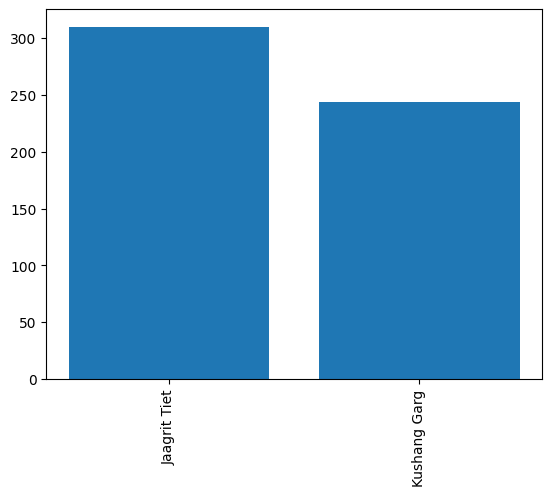

In [51]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
round((temp['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'name', 'users': 'percent'})

,percent,count
0,Jaagrit Tiet,55.86
1,Kushang Garg,43.96


In [53]:
import emoji
from collections import Counter

In [54]:
emojis =[]
for message in df['messages']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [55]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [56]:
emoji_df

,0,1
0,😂,34
1,🥳,31
2,🥂,14
3,👍,4
4,😇,4
5,😏,3
6,🐥,3
7,👟,3
8,😅,3
9,🎊,3


In [57]:
df

,message_date,users,messages,year,month,date,hour,minute
0,2022-01-03 21:59:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,January,3,21,59
1,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3,21,59
2,2022-01-03 21:59:00,Kushang Garg,<Media omitted>\n,2022,January,3,21,59
3,2022-01-03 21:59:00,Kushang Garg,Bhai iska 3 nd 4part btaiyo\n,2022,January,3,21,59
4,2022-01-03 22:00:00,Jaagrit Tiet,10 min\n,2022,January,3,22,0
...,...,...,...,...,...,...,...,...
550,2023-03-30 21:24:00,Jaagrit Tiet,na ek km na ek zyada\n,2023,March,30,21,24
551,2023-03-30 21:24:00,Kushang Garg,Itne bhai acc mei hai nhi\n,2023,March,30,21,24
552,2023-03-30 21:24:00,Jaagrit Tiet,😂😂\n,2023,March,30,21,24
553,2023-03-30 21:25:00,Kushang Garg,<Media omitted>\n,2023,March,30,21,25


In [58]:
df['month_num'] = df['message_date'].dt.month
timeline=df.groupby(['year', 'month_num', 'month']).count()['messages'].reset_index()


In [59]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [60]:
time

['January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'May-2022',
 'June-2022',
 'August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022',
 'January-2023',
 'February-2023',
 'March-2023']

In [61]:
timeline['time'] = time
timeline

,year,month_num,month,messages,time
0,2022,1,January,19,January-2022
1,2022,2,February,9,February-2022
2,2022,3,March,12,March-2022
3,2022,4,April,6,April-2022
4,2022,5,May,37,May-2022
5,2022,6,June,1,June-2022
6,2022,8,August,89,August-2022
7,2022,9,September,64,September-2022
8,2022,10,October,84,October-2022
9,2022,11,November,76,November-2022


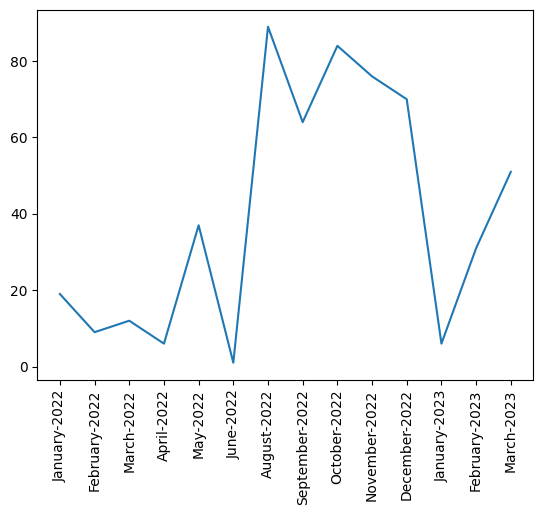

In [62]:
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df['day'] =df['message_date'].dt.day_name()

In [64]:
df['day'].value_counts()

day
Monday       218
Saturday     129
Tuesday       65
Thursday      57
Sunday        39
Wednesday     37
Friday        10
Name: count, dtype: int64